In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, matplotlib, pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.svm import SVC

Data preparation


Load data

In [3]:
with open('data\hand_written.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []

    for row in result:
        rows.append(row)
    # print(rows[1000])

Display data

['2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '60', '162', '255', '255', '255', '255', '255', '255', '224', '100', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '46', '77', '233', '255', '255', '255', '236', '246', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '255', '255', '255', '255', '255', '167', '65', '116', '25

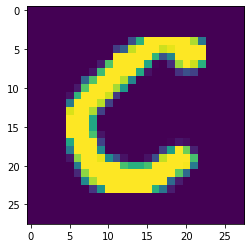

In [4]:
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

print(letter)
plt.imshow(x)

Store data into arrays (only 4 characters: A, B, C, D)

In [5]:
train_data = [] # training data
train_label = [] # label
for letter in rows:
    if (letter[0] == '0') or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
        x = np.array([int(j) for j in letter[1:]])
        # x = x.reshape(28, 28)
        train_data.append(x)
        train_label.append(int(letter[0]))
    else:
        break

Number of training data

In [7]:
print(len(train_label))

56081


In [6]:
train_data = np.array(train_data)
train_label = np.array(train_label)

Count the number of each character

In [8]:
numA = 0; numB = 0; numC = 0; numD = 0;
for i in range(56081):
  if train_label[i] == 0:
    numA = numA +1
  elif(train_label[i] == 1):
    numB = numB +1
  elif(train_label[i] == 2):
    numC = numC +1
  elif(train_label[i] == 3): 
    numD = numD +1

In [9]:
print(numA, numB, numC, numD)

13870 8668 23409 10134


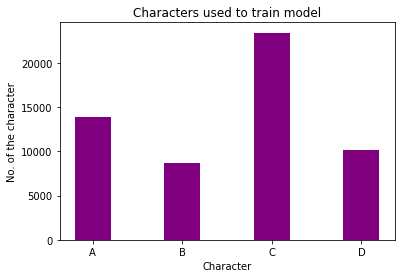

In [16]:
labelOfBar = ['A', 'B', 'C', 'D']
barValues = [numA, numB, numC, numD]

plt.bar(labelOfBar, barValues, color ='purple',width = 0.4)
plt.xlabel("Character")
plt.ylabel("No. of the character")
plt.title("Characters used to train model")
plt.show()

Divide data into 2 type: training data & test data (x:data, y:label)

In [17]:
train_x = train_data[:10000].astype(np.float32)
train_x = np.append(train_x, train_data[13871:20871].astype(np.float32), axis=0)
train_x = np.append(train_x, train_data[22539:42539].astype(np.float32), axis=0)
train_x = np.append(train_x, train_data[45948:53948].astype(np.float32), axis=0)
train_y = train_label[:10000].astype(np.float32)
train_y = np.append(train_y, train_label[13871:20871].astype(np.float32), axis=0)
train_y = np.append(train_y, train_label[22539:42539].astype(np.float32), axis=0)
train_y = np.append(train_y, train_label[45948:53948].astype(np.float32), axis=0)

test_x = train_data.astype(np.float32)
test_y = train_label.astype(np.float32)

Using K-NN algorithm to classify data

In [ ]:
listOfAccuracyEuclid = list()
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k) # metric = 'euclide'
    knn.fit(train_x,train_y)
    predicted= knn.predict(test_x)
    accuracy = 100*accuracy_score(test_y, predicted) 
    listOfAccuracyEuclid.append(accuracy)
    print(accuracy)


99.9322408658904
99.71826465291275
99.39373406322997
99.27248087587597
99.13874574276494


In [8]:
listOfAccuracyManhatta = list()
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k, p=1) # metric = 'manhatta'
    knn.fit(train_x,train_y)
    predicted= knn.predict(test_x)
    accuracy = 100*accuracy_score(test_y, predicted) 
    listOfAccuracyManhatta.append(accuracy)
    print(accuracy)

99.91084324459264
99.66655373477649
99.14587828319752
99.06742033843904
98.8159982881903


In [18]:
knn = KNeighborsClassifier(n_neighbors=3) # metric = 'euclide'
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

Storing model

In [19]:
knnPickle = open('data\knnpickle_file', 'wb') 
pickle.dump(knn, knnPickle)    